# ============================================================
# Assignment: Perceptron & Activation Functions
# ============================================================
---

## Instructions:
- This assignment contains **two parts**.
- Fill in all code and explanation sections where indicated.
- Do NOT use high-level ML libraries like TensorFlow or PyTorch for implementation.
- You may use NumPy, Matplotlib, and scikit-learn for dataset generation and visualization.
---

## Part 1 — Perceptron from Scratch

### Q1. Dataset Preparation
1. Generate a **2D dataset** with 2 classes using `make_blobs` from scikit-learn.
2. Convert labels so that one class is `-1` and the other is `1`.
3. Visualize the dataset using a scatter plot.

**Your Task:**
- Write the code to generate and visualize the dataset.
- Provide the plot in your answer.


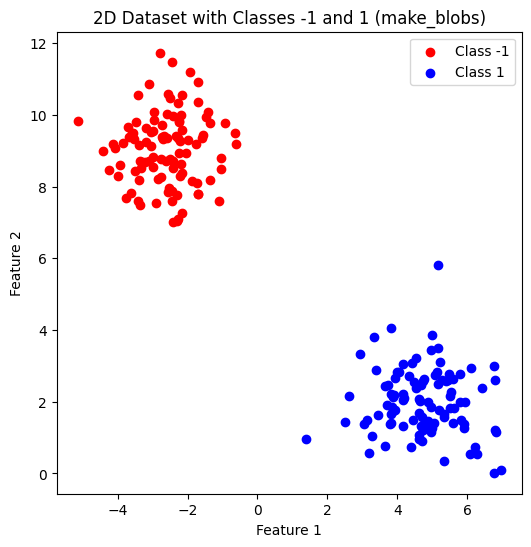

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=200, centers=2, n_features=2, random_state=42)
y = np.where(y == 0, -1, 1)
plt.figure(figsize=(6, 6))
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Class -1')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.title("2D Dataset with Classes -1 and 1 (make_blobs)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

### Q2. Perceptron Implementation
1. Create a Python class `Perceptron` with:
   - `__init__` — initializes learning rate, number of epochs, and weights/bias.
   - `fit(X, y)` — trains the perceptron using the **Perceptron Learning Rule**.
   - `predict(X)` — returns predictions for given input features.
2. Use the update rule:  
$$
w \gets w + \eta (y_i - \hat{y}_i) x_i
$$
3. Train the Perceptron on your dataset.

**Your Task:**
- Implement and train the Perceptron.
- Display the final weights and bias.


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, centers=2, n_features=2, random_state=42)
y = np.where(y == 0, -1, 1)
class Perceptron:
    def __init__(self, lr=0.1, epochs=100):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                if y[idx] * linear_output <= 0:
                    self.weights += self.lr * y[idx] * x_i
                    self.bias += self.lr * y[idx]

    def predict(self, X):
        return np.sign(np.dot(X, self.weights) + self.bias)


In [11]:
X_train, y_train = make_blobs(n_samples=200, centers=2, n_features=2, random_state=42)
y_train = np.where(y_train == 0, -1, 1)


In [12]:
model = Perceptron(lr=0.1, epochs=10)
model.fit(X, y)
print("Final weights:", model.weights)
print("Final bias:", model.bias)


Final weights: [ 0.99959474 -0.52230523]
Final bias: 0.1


### Q3. Decision Boundary
1. Write a function to plot the decision boundary of your trained perceptron.
2. Visualize the boundary along with the dataset.

**Your Task:**
- Provide the decision boundary plot.
- Explain in **2–3 sentences** how the perceptron separates the two classes.


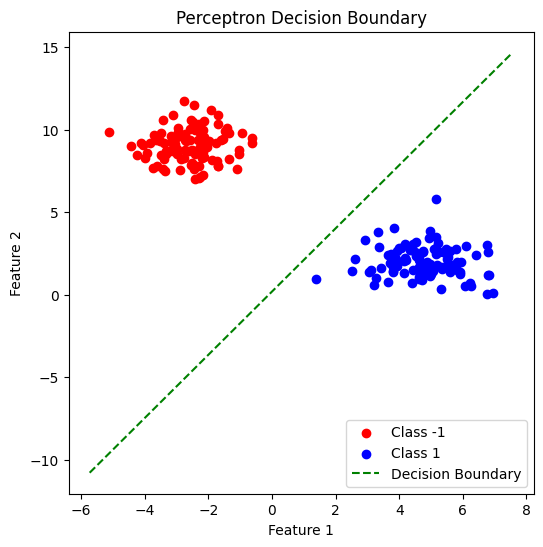

In [13]:
plt.figure(figsize=(6, 6))
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Class -1')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')

x_min, x_max = plt.xlim()
xx = np.linspace(x_min, x_max, 100)
yy = -(model.weights[0] * xx + model.bias) / model.weights[1]
plt.plot(xx, yy, 'g--', label='Decision Boundary')

plt.title("Perceptron Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

**Explanation (2–3 sentences):**
The perceptron separates two groups of points by finding a straight line between them.
It keeps adjusting the line whenever it puts a point on the wrong side, until it can tell the groups apart well.
In the end, it decides which side of the line a new point belongs to.




## Part 2 — Activation Functions

### Q4. Activation Function Implementation
Implement the following activation functions and their derivatives:
- Sigmoid
- Tanh
- ReLU
- Leaky ReLU
- Softmax

**Your Task:**
- For each activation function:
  - Write the forward pass formula.
  - Write the derivative formula.

**Table: Activation Function Formulas & Derivatives**
| Function   | Formula | Derivative |
|------------|---------|------------|
| Sigmoid    |         |            |
| Tanh       |         |            |
| ReLU       |         |            |
| Leaky ReLU |         |            |
| Softmax    |         |            |


In [14]:
import numpy as np
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def leaky_relu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)


def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x, axis=0)

def softmax_derivative(x):
    s = softmax(x)
    return np.diagflat(s) - np.outer(s, s)


| Function       | Formula (Forward Pass)                                 | Derivative Formula                                      |
| -------------- | ------------------------------------------------------ | ------------------------------------------------------- |
| **Sigmoid**    | $\sigma(x) = \frac{1}{1 + e^{-x}}$                     | $\sigma'(x) = \sigma(x) \cdot (1 - \sigma(x))$          |
| **Tanh**       | $\tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}$     | $1 - \tanh^2(x)$                                        |
| **ReLU**       | $f(x) = \max(0, x)$                                    | $1$ if $x > 0$, else $0$                                |
| **Leaky ReLU** | $f(x) = \max(\alpha x, x)$                             | $1$ if $x > 0$, else $\alpha$                           |
| **Softmax**    | $\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_j e^{x_j}}$ | $s_i (1 - s_i)$ for $i = j$, else $-s_i s_j$ (Jacobian) |


### Q5. Testing Activation Functions
1. Choose input values: `[-2, -1, 0, 1, 2]`.
2. Apply each activation function to these inputs.
3. Record the outputs in a table.

**Output Table:**
| Input | Sigmoid | Tanh | ReLU | Leaky ReLU | Softmax |
|-------|---------|------|------|------------|---------|
| -2    |         |      |      |            |         |
| -1    |         |      |      |            |         |
| 0     |         |      |      |            |         |
| 1     |         |      |      |            |         |
| 2     |         |      |      |            |         |


In [15]:
import numpy as np
import pandas as pd

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x)

inputs = np.array([-2, -1, 0, 1, 2], dtype=float)

sigmoid_vals = sigmoid(inputs)
tanh_vals = tanh(inputs)
relu_vals = relu(inputs)
leaky_relu_vals = leaky_relu(inputs)
softmax_vals = softmax(inputs)
df = pd.DataFrame({
    "Input": inputs,
    "Sigmoid": np.round(sigmoid_vals, 4),
    "Tanh": np.round(tanh_vals, 4),
    "ReLU": np.round(relu_vals, 4),
    "Leaky ReLU": np.round(leaky_relu_vals, 4),
    "Softmax": np.round(softmax_vals, 4)
})

print(df)


   Input  Sigmoid    Tanh  ReLU  Leaky ReLU  Softmax
0   -2.0   0.1192 -0.9640   0.0       -0.02   0.0117
1   -1.0   0.2689 -0.7616   0.0       -0.01   0.0317
2    0.0   0.5000  0.0000   0.0        0.00   0.0861
3    1.0   0.7311  0.7616   1.0        1.00   0.2341
4    2.0   0.8808  0.9640   2.0        2.00   0.6364


### Q6. Visualization of Activation Functions
1. Plot each activation function for input range `[-5, 5]`.
2. Compare their shapes visually.

**Your Task:**
- Provide the plots for all activation functions.
- In **3–4 sentences**, explain how the choice of activation function can affect learning in a neural network.


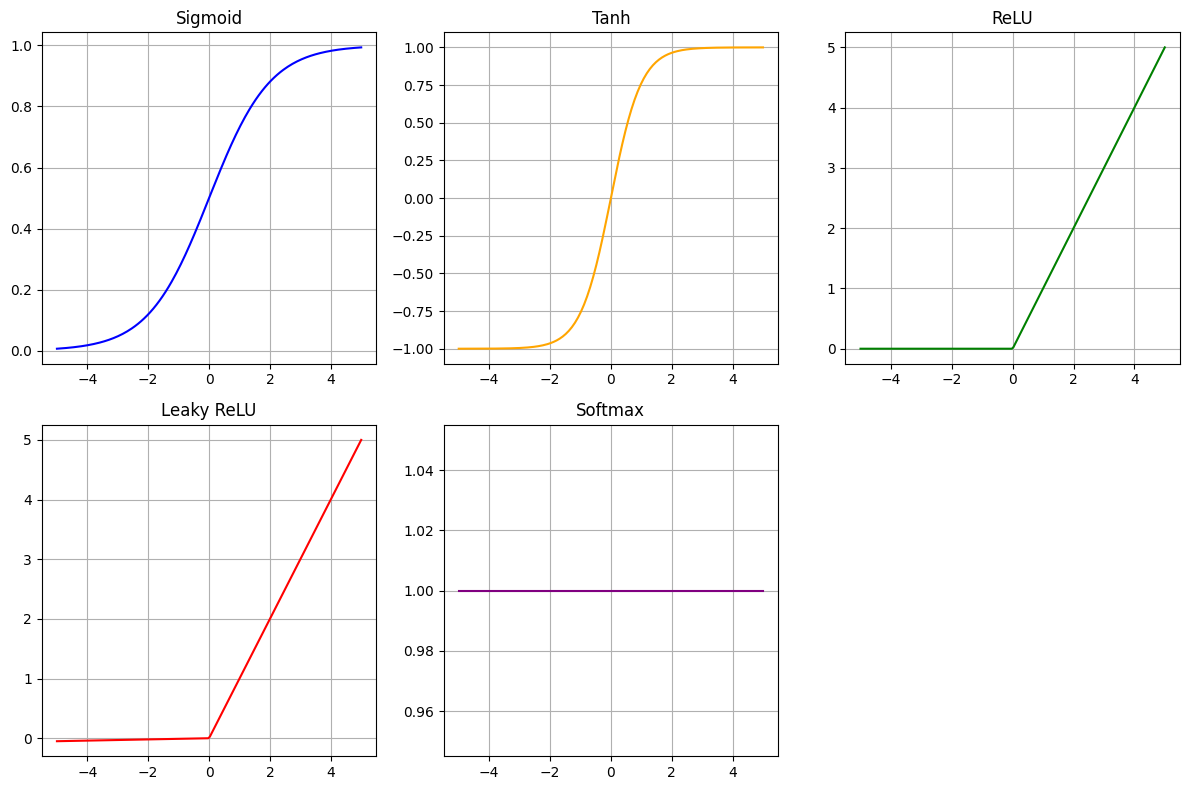

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x)

# Input range
x = np.linspace(-5, 5, 200)


plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.plot(x, sigmoid(x), label="Sigmoid", color='blue')
plt.title("Sigmoid")
plt.grid(True)

plt.subplot(2, 3, 2)
plt.plot(x, tanh(x), label="Tanh", color='orange')
plt.title("Tanh")
plt.grid(True)

plt.subplot(2, 3, 3)
plt.plot(x, relu(x), label="ReLU", color='green')
plt.title("ReLU")
plt.grid(True)

plt.subplot(2, 3, 4)
plt.plot(x, leaky_relu(x), label="Leaky ReLU", color='red')
plt.title("Leaky ReLU")
plt.grid(True)

softmax_vals = [softmax(np.array([val]))[0] for val in x]
plt.subplot(2, 3, 5)
plt.plot(x, softmax_vals, label="Softmax", color='purple')
plt.title("Softmax")
plt.grid(True)

plt.tight_layout()
plt.show()


**Explanation (3–4 sentences):**



These graphs show how each activation function changes the input numbers.
Sigmoid and Tanh squeeze values into small ranges — Sigmoid between 0 and 1, Tanh between -1 and 1.
ReLU gives 0 for negative numbers and grows for positive numbers, while Leaky ReLU lets small negative values pass through.
Softmax turns a list of numbers into probabilities that add up to 1, useful for picking the most likely class.
